## Import Dataset and Prepare Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_before_18 = pd.read_csv('./before-2018-yearly-emission.csv')
data_19_20 = pd.read_csv('./daily-co2-per-contry-2019-2021.csv')
data_before_18.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  195 non-null    object 
 1   unit            195 non-null    object 
 2   1990            193 non-null    object 
 3   1991            193 non-null    object 
 4   1992            193 non-null    float64
 5   1993            193 non-null    float64
 6   1994            193 non-null    float64
 7   1995            193 non-null    float64
 8   1996            193 non-null    float64
 9   1997            193 non-null    float64
 10  1998            193 non-null    float64
 11  1999            193 non-null    float64
 12  2000            193 non-null    float64
 13  2001            193 non-null    float64
 14  2002            193 non-null    float64
 15  2003            193 non-null    float64
 16  2004            193 non-null    float64
 17  2005            193 non-null    flo

In [2]:
data_before_18 = data_before_18.rename(columns = {"Country/Region": "country"})
data_before_18['country'] = data_before_18['country'].str.replace('United States', 'US')
data_before_18['country'] = data_before_18['country'].str.replace('United Kingdom', 'UK')

areas_19_20 = ["China", "US", "India"]
areas_before_18 = ["China", "US", "India"]

data_before_18 = data_before_18[data_before_18["country"].isin(areas_19_20)]
data_19_20 = data_19_20[data_19_20["country"].isin(areas_before_18)]

# convert date to Date object
data_19_20['date'] = pd.to_datetime(data_19_20['date'])


In [3]:
data_compare = {"country": [], "2014": [], "2015": [],"2016": [],"2017": [],"2018": [], "2019": [], "2020": []}

for area in data_before_18['country'].unique():
    data_compare["country"].append(area)
    data_compare["2014"].append(data_before_18.loc[(data_before_18['country'] == area), "2014"].values[0])
    data_compare["2015"].append(data_before_18.loc[(data_before_18['country'] == area), "2015"].values[0])
    data_compare["2016"].append(data_before_18.loc[(data_before_18['country'] == area), "2016"].values[0])
    data_compare["2017"].append(data_before_18.loc[(data_before_18['country'] == area), "2017"].values[0])
    data_compare["2018"].append(data_before_18.loc[(data_before_18['country'] == area), "2018"].values[0])
    data_compare["2019"].append(
        round(data_19_20[(data_19_20["country"] == area) & (data_19_20["date"] >= "2019-01-01") & (data_19_20["date"] < "2020-01-01")]["value"].sum(), 2))
    data_compare["2020"].append(
        round(data_19_20[(data_19_20["country"] == area) & (data_19_20["date"] >= "2020-01-01") & (data_19_20["date"] <= "2020-12-31")]["value"].sum(), 2))
    
    
compre_df = pd.DataFrame(data_compare)
compre_df


,country,2014,2015,2016,2017,2018,2019,2020
0,China,9184.77,9120.27,9164.21,9367.67,9663.36,10492.85,10563.36
1,US,4683.35,4563.52,4656.84,4581.90,4749.57,5111.43,4598.31
2,India,2072.03,2085.38,2149.01,2267.16,2400.25,2471.63,2269.83


## Observation: We saw a never happened decline in total emission of co2 in 2020 (except China)

In [4]:
compre_df_t = compre_df.T
compre_df_t.columns = compre_df_t.iloc[0]
compre_df_t = compre_df_t[1:]
compre_df_t


country,China,US,India
2014,9184.77,4683.35,2072.03
2015,9120.27,4563.52,2085.38
2016,9164.21,4656.84,2149.01
2017,9367.67,4581.9,2267.16
2018,9663.36,4749.57,2400.25
2019,10492.85,5111.43,2471.63
2020,10563.36,4598.31,2269.83


[Text(0, 0.5, '')]

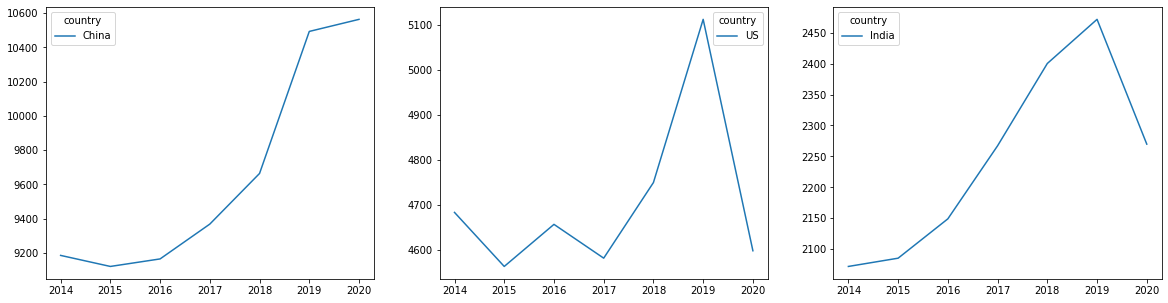

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.lineplot(ax=axes[0], data=compre_df_t.loc[:, ["China"]]).set(ylabel=None)
sns.lineplot(ax=axes[1], data=compre_df_t.loc[:, ["US"]]).set(ylabel=None)
sns.lineplot(ax=axes[2], data=compre_df_t.loc[:, ["India"]]).set(ylabel=None)
